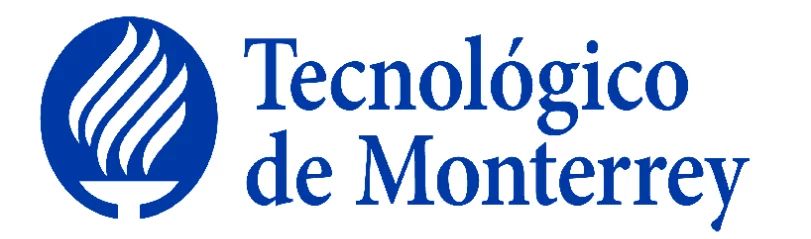

#Model Development in Python
###Por: Rigoberto Vega Escudero A01793132

Simple and Multiple Linear Regression
- Model Evaluation using Visualization - Polynomial Regression and Pipelines
- R-squared and MSE for In-Sample Evaluation - Prediction and Decision Making
- And how can you determine a fair value for a used car?
A model or estimator can be thought of as a mathematical equation used to predict a value given one or more other values.

Relating one or more independent variables or features to dependent variables.

###Model
A model or estimator can be thought of as a mathematical equation used to predict a value given one or more other values. Relating one or more independent variables or features to dependent variables.

In [ ]:
#First we impor pandas
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"
#Use the readcsv method, note here is that our data does not have column labels or headers, so we need to specify that in our module as below
df = pd.read_csv(url, header= None)

df #prints the entire dataframe (not recommended for large datasets)
#Adding a list with all the headers names that we will use
headers = ["symboling", "normalized-losses", "make","fuel-type","aspiration:","num-of-doors",
           "body-style","drive-wheels","engine-location","wheel-base","length","width","height","curb-weight",
           "engine-type","num-of-cylinders","engine-size","fuel-system","bore","stroke","compression-ratio",
           "horsepower","peak-rpm","city-mpg","highway-mpg","price"]
df.columns = headers #Code to remplace the headers name with the list elements
df


,symboling,normalized-losses,make,fuel-type,aspiration:,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [ ]:
df['price'] = df['price'].str.replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['price'] = df['price'].astype('int') #Here we are changing the datatype form object to integer
df['price'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


dtype('int64')

##Linear Regression and Multiple Linear Regression

Linear Regression will refer to one independent variable to make a prediction.
Multiple Linear Regression will refer to multiple independent variables to make a prediction.

Simple Linear Regression (or SLR) is: A method to help us understand the relationship between two variables: The predictor (independent) variable x, and the target (dependent) variable y.

We would like to come up with a linear relationship
between the variables shown here. 
- The parameter b zero is the intercept.

- The parameter b one is the slope When we fit or train the model, we will come up with these parameters. This step requires lots of math, so we will not focus on this part.

In this model, this uncertainty is taken into account by assuming a small random value is added to the point
on the line; this is called noise. The figure on the left shows the distribution of the noise. The vertical axis shows the value added and the horizontal axis illustrates the probability that the value will be added. Usually, a small positive value is added, or a small negative value. Sometimes large values are added, but for the most part, the values added are near zero. We can summarize the process like this:

- We have a set of training points - We use these training points to fit or train
the model and get parameters - We then use these parameters in the model
- We now have a model; we use the hat on the y to denote the model is an estimate
- We can use this model to predict values that we haven't seen.

In [ ]:
#Linear regression in python
from sklearn.linear_model import LinearRegression #Import the library
#We use a constructor for the modee
lm = LinearRegression()

In [ ]:
#Define the predicted variable
X = df[['highway-mpg']]
Y = df['price']

In [ ]:
#Method .fit() this to fit the model and get the parametres b0 and b1

lm.fit(X,Y)

LinearRegression()

In [ ]:
#Obtain the prediction
Yhat = lm.predict(X)
Yhat

array([15975.79026479, 15975.79026479, 16782.55750053, 13555.48855758,
       20009.62644348, 17589.32473626, 17589.32473626, 17589.32473626,
       21623.16091495, 20009.62644348, 14362.25579332, 14362.25579332,
       15169.02302905, 15169.02302905, 17589.32473626, 20009.62644348,
       20009.62644348, 21623.16091495, -5000.15786438,  3067.51449299,
        3067.51449299,  4681.04896447,  7101.35067168, 13555.48855758,
        7101.35067168,  7101.35067168,  7101.35067168, 13555.48855758,
       13555.48855758, 18396.091972  , -5806.92510011,  7101.35067168,
        3874.28172873, 10328.41961463, 10328.41961463, 10328.41961463,
       10328.41961463, 11135.18685037, 11135.18685037, 11135.18685037,
       11135.18685037, 15169.02302905, 12748.72132184, 14362.25579332,
        3067.51449299,  3067.51449299, 14362.25579332, 22429.92815069,
       22429.92815069, 24043.46262216, 12748.72132184,  7101.35067168,
        7101.35067168,  7101.35067168,  7101.35067168, 19202.85920774,
      

In [ ]:
#obtain the intercept b0
lm.intercept_

37758.50562969372

In [ ]:
#obtain te slope b1
lm.coef_

array([-806.76723574])

**The Relationship between Price and Highway MPG is given by this equation in bold: “Price = 38,423.31 minus 821.73 times highway mpg” **

Multiple Linear Regression is used to explain the relationship between
- One continuous target (Y) variable, and - Two or more predictor (X) variables.
If we have for example 4 predictor variables, then:
- B0: intercept (X=0) - B1: the coefficient or parameter of 𝑋1:
- B2: the coefficient of parameter 𝑋2: and so on

If there are only two variables then we can visualize the values. Consider the following function.
The variables 𝑋1and 𝑋2 can be visualized on a 2D plane; let’s do an example on the next slide. The table contains different values of the predictor variables 𝑋1 and 𝑋2. The position of each point is placed on the 2D plane, color coded accordingly. Each value of the predictor variables 𝑋1 and 𝑋2 will be mapped to a new value 𝑌 (y hat) the new values of 𝑌 (y hat) are mapped in the vertical direction, with height proportional to the value that yhat takes.

We can fit the Multiple linear regression as follows:

- We can extract the 4 predictor variables and store them in the variable Z.
- Then train the model as before using the method train, with the features or dependent variables and the targets : (colon) We can also obtain a prediction using the method predict. 

In this case, the input is an array or dataframe with 4 columns, the number of rows correspond to the number of samples.

The output is an array with the same number of elements as number of samples.

The intercept is an attribute of the object. And the coefficients are also attributes.

It is helpful to visualize the equation, replacing the dependent variable names with actual names.

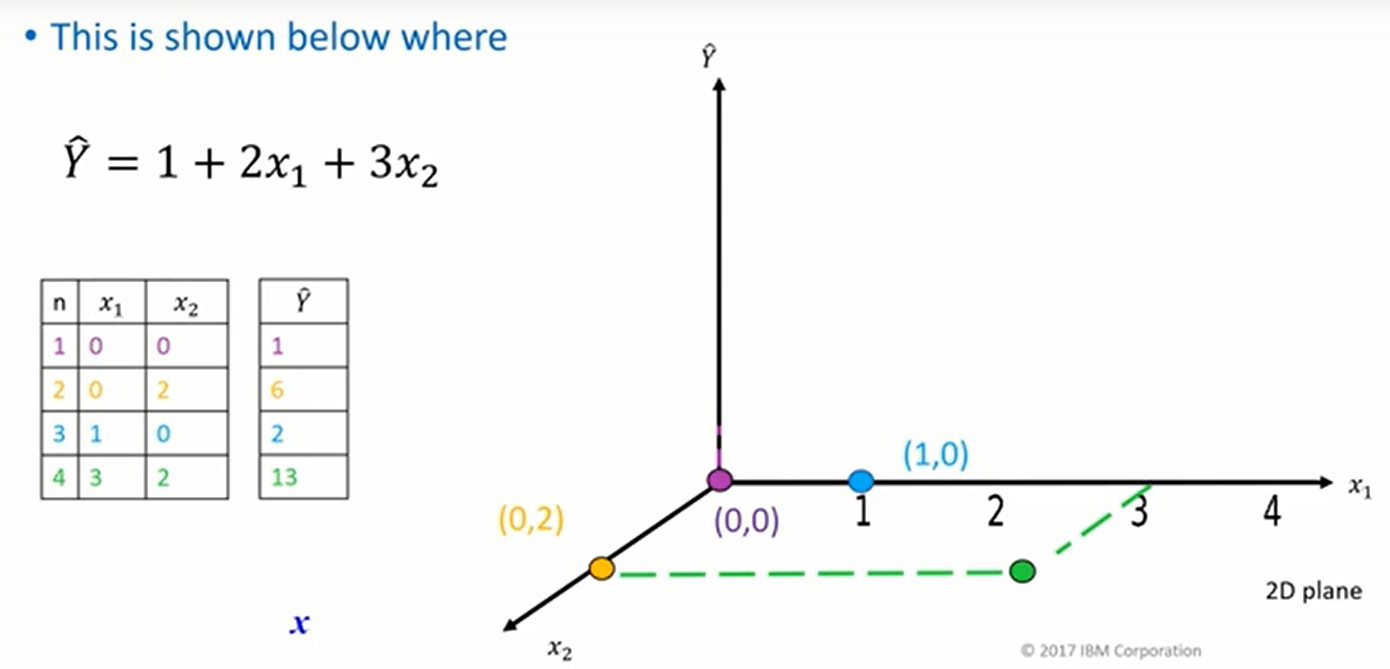

In [ ]:
df['horsepower']

0      111
1      111
2      154
3      102
4      115
      ... 
200    114
201    160
202    134
203    106
204    114
Name: horsepower, Length: 205, dtype: object

In [ ]:
df['horsepower'] = df['horsepower'].str.replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['horsepower'] = df['horsepower'].astype('int') #Here we are changing the datatype form object to integer
df['horsepower'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


dtype('int64')

In [ ]:
df['curb-weight'] 
df['curb-weight'] = df['curb-weight'].astype('object') 
df['curb-weight'] 

0      2548
1      2548
2      2823
3      2337
4      2824
       ... 
200    2952
201    3049
202    3012
203    3217
204    3062
Name: curb-weight, Length: 205, dtype: object

In [ ]:
df['curb-weight'] = df['curb-weight'].astype(str) 
df['curb-weight'] = df['curb-weight'].str.replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['curb-weight'] = df['curb-weight'].astype('int') #Here we are changing the datatype form object to integer
df['curb-weight'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('int64')

In [ ]:
df['engine-size'] = df['engine-size'].astype(str)
df['engine-size'] = df['engine-size'].str.replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['engine-size'] = df['engine-size'].astype('int') #Here we are changing the datatype form object to integer
df['engine-size'].dtype

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


dtype('int64')

In [ ]:
df['highway-mpg'] = df['highway-mpg'].astype(str)
df['highway-mpg'] = df['highway-mpg'].replace('?','0') #Replacing the '?' with '0' to be able to convert it
df['highway-mpg'] = df['highway-mpg'].astype('int') #Here we are changing the datatype form object to integer
df['highway-mpg'].dtype

dtype('int64')

In [ ]:
#Multiple lineal regression in python
#Extract the for predictor variables
Z = df[['horsepower','curb-weight','engine-size','highway-mpg']]

In [ ]:
#Train the model as before
lm.fit(Z, df['price'])

LinearRegression()

In [ ]:
#Obtain the prediction
Yhat = lm.predict(Z)
Yhat

array([13896.49032606, 13896.49032606, 17227.23244169, 10375.21137424,
       16290.42510874, 14803.20232557, 15851.4869507 , 16193.65700638,
       16774.35165898, 16232.01250439, 10621.32269212, 10621.32269212,
       18036.9536937 , 18208.03872154, 19633.90021086, 25530.04045633,
       25996.6359868 , 26734.65012691, -1481.28889727,  4655.05455499,
        4763.92684543,  5019.51072075,  5543.28751782,  8477.43453608,
        5826.35547297,  5894.78948411,  5894.78948411,  8673.40465888,
       12528.96986454, 18033.50821987,  2514.87539344,  5556.62590679,
        3512.15132738,  6631.38203079,  6681.15222071,  6849.12661168,
        6892.67552786,  9723.08620511,  9887.94995921,  9934.60951226,
       10146.1328194 , 11240.50567186, 10186.22451351, 10885.2541009 ,
        4655.05455499,  4763.92684543, 12973.25930694, 34239.19102087,
       34239.19102087, 41551.14469471,  6922.40536039,  5731.36586927,
        5746.91905362,  5871.34452841,  5886.89771276,  7312.14020322,
      

In [ ]:
#obtain the intercept b0
lm.intercept_

-3558.1248837676358

In [ ]:
#obtain te slope b1
lm.coef_

array([  -4.52518033,    3.11063687,  113.42306658, -174.59226569])

Regression plots are a good estimate of:
- The relationship between two variables,
- The strength of the correlation, and
The direction of the relationship (positive or negative).
- The horizontal axis is the independent variable.
- The vertical axis is the dependent variable.

Each point represents a different target point. The fitted line represents the predicted value.

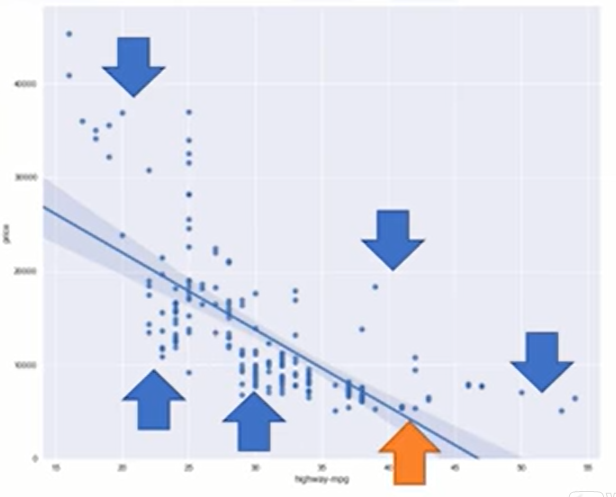

(0.0, 48162.4071014881)

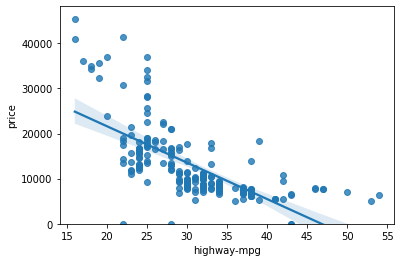

In [ ]:
#Try the code
#import the library
import seaborn as sns
sns.regplot(x="highway-mpg", y='price', data=df)
plt.ylim(0,)

Examining the predicted value and actual value we see a difference.

We obtain that value by subtracting the predicted value and the actual target value.

We then plot that value on the vertical axis, with the dependent variable as the horizontal axis.

###Residual Plot
We expect to see the results to have zero mean.

Distributed evenly around the x axis with similar variance; there is no curvature.

This type of residual plot suggests a linear plot is appropriate.
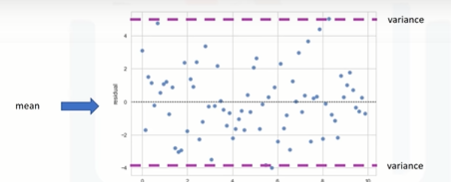

In this residual plot there is curvature, the values of the error change with x.

For example, in the region, all the residual errors are positive.

In this area, the residuals are negative. In the final location, the error is large.

The residuals are not randomly separated; this suggests the linear assumption is incorrect.

This plot suggests a non-linear function, we will deal with this in the next section.
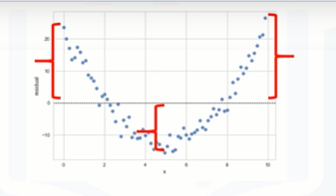

In this plot, we see that variance of the residuals increases with x, therefore our model is incorrect.
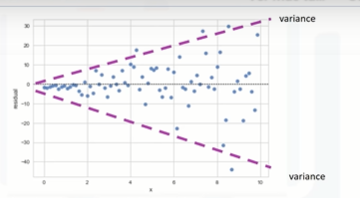

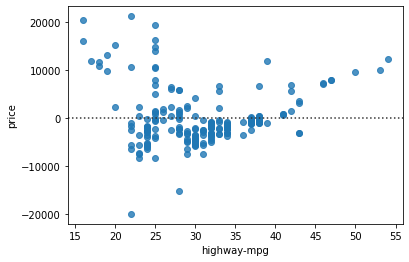

In [ ]:
#try the code
#create a residual plot
sns.residplot(x="highway-mpg", y='price', data=df)


### Distribution plots

A distribution plot counts the predicted value versus the actual value.
These plots are extremely useful for visualizing models with more than one independent variable or feature.
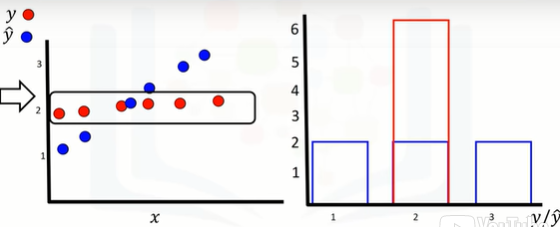


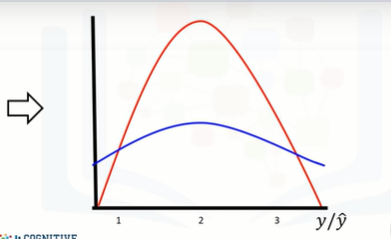

The vertical access is scaled to make the area under the distribution equal to one.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


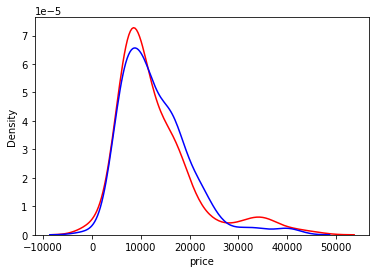

In [ ]:
#try the code
#create a distribution plot
axl = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')

sns.distplot(Yhat, hist=False, color='b', label='Fitted Values', ax=axl)

##Polynomial Regression and Pipelines.

We Transform our data into a polynomial, then use linear regression to fit the parameter.
Then we will discuss pipelines.

Pipelines are a way to simplify your code.

Polynomial regression is a special case of the general linear regression.

This method is beneficial for describing curvilinear relationships.

What is a curvilinear relationship?

It’s what you get by squaring or setting higher-order terms of the predictor variables in the model, transforming the data.

The model can be quadratic, which means that the predictor variable in the model is squared.

This is a second order Polynomial regression with a figure representing the function.

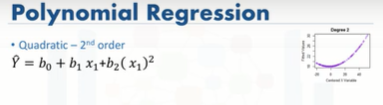

The model can be cubic, which means that the predictor variable is cubed.
This is a third order Polynomial regression.
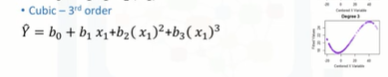

**The degree of the regression makes a big difference and can result in a better fit if you pick the right value.
In all cases, the relationship between the variable and the parameter is always linear. **

In [ ]:
#try the code

x = np.array([0.0, 1.0, 2.0, 3.0,  4.0,  5.0])
y = np.array([0.0, 0.8, 0.9, 0.1, -0.8, -1.0])
f = np.polyfit(x,y,3)#Calculate polynomial of 3rd order
p=np.poly1d(f)#we can obtein the out the model
print(p)

         3          2
0.08704 x - 0.8135 x + 1.693 x - 0.03968


We can also have multi-dimensional polynomial linear regression.
The expression can get complicated; here are just some of the terms for a two-dimensional second order polynomial.
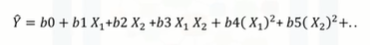

In [ ]:
#try the code
#Obtain the polynomial regression for one or more dimension
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2, include_bias=False)
x_polly = pr.fit_transform(Z[['horsepower','curb-weight']])

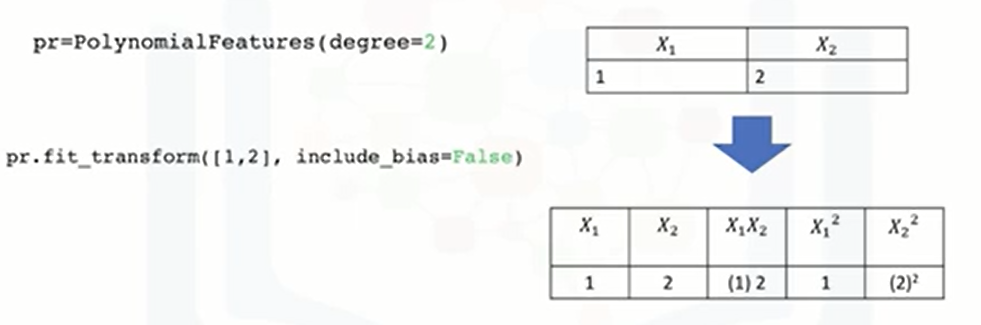

In [ ]:
#Standarize each feature
from sklearn.preprocessing import StandardScaler
SCALE = StandardScaler()
SCALE.fit(Z[['horsepower','highway-mpg']])
Z_scale = SCALE.transform(Z[['horsepower','highway-mpg']])

Z_scale

array([[ 0.19053401, -0.54605874],
       [ 0.19053401, -0.54605874],
       [ 1.24619543, -0.69162706],
       [-0.03041838, -0.10935377],
       [ 0.28873507, -1.27390036],
       [ 0.16598375, -0.83719538],
       [ 0.16598375, -0.83719538],
       [ 0.16598375, -0.83719538],
       [ 0.90249171, -1.565037  ],
       [ 1.39349702, -1.27390036],
       [-0.05496864, -0.25492209],
       [-0.05496864, -0.25492209],
       [ 0.43603667, -0.40049041],
       [ 0.43603667, -0.40049041],
       [ 0.43603667, -0.83719538],
       [ 1.93360286, -1.27390036],
       [ 1.93360286, -1.27390036],
       [ 1.93360286, -1.565037  ],
       [-1.35613271,  3.23871768],
       [-0.81602687,  1.78303445],
       [-0.81602687,  1.78303445],
       [-0.8651274 ,  1.4918978 ],
       [-0.8651274 ,  1.05519283],
       [-0.03041838, -0.10935377],
       [-0.8651274 ,  1.05519283],
       [-0.8651274 ,  1.05519283],
       [-0.8651274 ,  1.05519283],
       [-0.03041838, -0.10935377],
       [-0.37412209,

###Pipelines

help us to simplify our code by using them
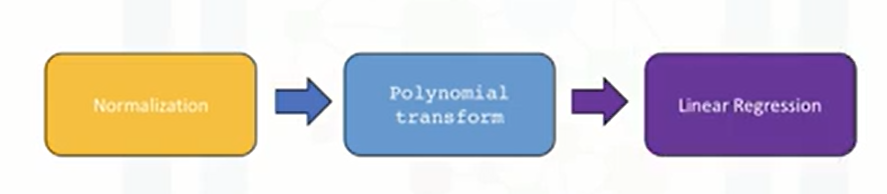

In [ ]:
from multiprocessing import Pipe
#import the pipeline librery
from sklearn.pipeline import Pipeline
Y = df['price']
X = df[['horsepower','curb-weight','engine-size','highway-mpg']]
#make the pipeline
input = [('scale', StandardScaler()),
         ('polynomial',PolynomialFeatures(degree=2)),
         ('model',LinearRegression())]
#evaluate the model, estandarization, etc. with the pipeline
Pipe = Pipeline(steps = input)
Pipe.fit(X,Y)
Yhat = Pipe.predict(X)
Yhat

array([13721.23748493, 13721.23748493, 17810.41589015, 10781.85078941,
       16403.75288234, 14453.28328635, 15161.17145237, 15476.96282498,
       18339.4472433 , 17255.17362938, 10831.90178239, 10831.90178239,
       16512.10791124, 16605.41727872, 18733.80709282, 26063.20586296,
       24920.11453447, 26597.30776597,  4173.19552675,  5832.24427185,
        5807.74604131,  5947.65475618,  5876.93008292, 10891.05209733,
        6046.99284786,  6092.39080869,  6092.39080869, 10614.23839566,
       11048.57037098, 19578.71080898,  5219.98540272,  6694.23213812,
        5092.14655272,  6683.00970208,  6700.24573537,  6764.93105982,
        6783.34181957,  8906.82443291,  9005.63733961,  9035.36092494,
        9179.83360997, 11191.12585549, 10438.70790895,  8553.84389664,
        5832.24427185,  5807.74604131, 11919.18832975, 35986.0654272 ,
       35986.0654272 , 41647.23705079,  4639.21578953,  5958.23967685,
        5967.98373613,  6049.03797798,  6059.55747917, 10288.6337472 ,
      

##Measures for In-Sample Evaluation
We want to numerically evaluate our models.

These measures are a way to numerically determine how good the model fits on our data.

Two important measures that we often use to determine the fit of a model

- Mean Square Error (MSE)
- R-squared.



**MSE**

To measure the MSE, we find the difference between the actual value y and the predicted value yhat then square it.

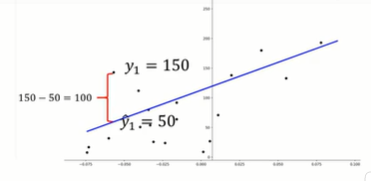

In this case, the actual value is 150; the predicted value is 50. Subtracting these points we get 100.

We then square the number. We then take the Mean or average of all the errors by adding then all together and dividing by the number of samples.

In [ ]:
#try the code
#import the libraries
from sklearn.metrics import mean_squared_error

mean_squared_error(df['price'], Y)

0.0

**R-squared**

R-squared is also called the coefficient of determination. It’s a measure to determine how close the data is to the fitted regression line. So how close is our actual data to our estimated model?

Think about it as comparing a regression model to a simple model, i.e., the mean of the data points. If the variable x is a good predictor our model should perform much better than with just the mean.

Coefficient of Determination or R^2 is 1 minus the ratio of the MSE of the regression line divided by the MSE of the average of the data points. For the most part, it takes values between 0 and 1.
Let’s look at a case where the line provides a relatively good fit.
The blue line represents the regression line.

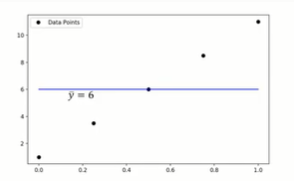


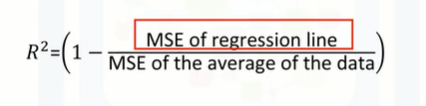

**Good Fit**

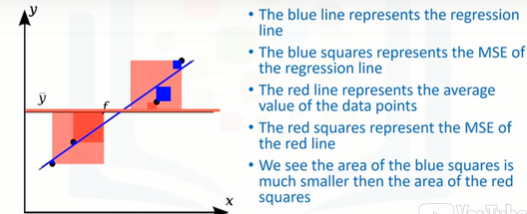

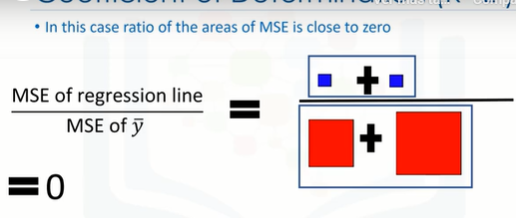

In [ ]:
#Try the code

#here we will execute the R-square metric for this model.
Y = df['price']
X = df[['highway-mpg']]

lm.fit(X,Y)
lm.score(X,Y)

0.47289700751877217

##Prediction and Decision Making

The first thing you should do is make sure your model results make sense.
You should always use:
- Do the predicted values make sense?
- Visualization.
- Numerical measures for evaluation. 
- Comparing between different models.



In [ ]:
#try the code

#first we train the model
Y = df['price']
X = df[['highway-mpg']]

lm.fit(df[['highway-mpg']],df['price'])
#lets predict the price of a car with 30 highway-mpg
lm.predict(np.array([[30]]))
lm.coef_

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([-806.76723574])

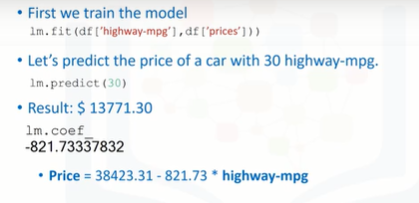

Sometimes your model will produce values that don't make sense, for example, if we plot the model out for highway-mpg, in the ranges of 0 to 100, we get negative values for the price.

This could be because the values in that range are not realistic, the linear assumption is incorrect, or we don't have data for cars in that range.

In this case, it is unlikely that a car will have fuel mileage in that range, so our model seems valid.

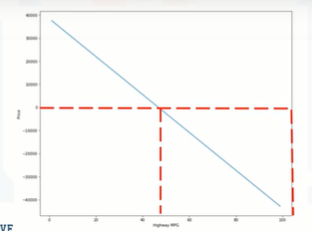

In [ ]:
#Excercise for testing the last hypotesis
#create an array with values to 1 to 100 in a singular increment
new_input = np.arange(1,101,1).reshape(-1,1)
new_input

yhat = lm.predict(new_input)
yhat

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([ 36951.73839396,  36144.97115822,  35338.20392248,  34531.43668674,
        33724.66945101,  32917.90221527,  32111.13497953,  31304.3677438 ,
        30497.60050806,  29690.83327232,  28884.06603658,  28077.29880085,
        27270.53156511,  26463.76432937,  25656.99709364,  24850.2298579 ,
        24043.46262216,  23236.69538642,  22429.92815069,  21623.16091495,
        20816.39367921,  20009.62644348,  19202.85920774,  18396.091972  ,
        17589.32473626,  16782.55750053,  15975.79026479,  15169.02302905,
        14362.25579332,  13555.48855758,  12748.72132184,  11941.9540861 ,
        11135.18685037,  10328.41961463,   9521.65237889,   8714.88514316,
         7908.11790742,   7101.35067168,   6294.58343594,   5487.81620021,
         4681.04896447,   3874.28172873,   3067.51449299,   2260.74725726,
         1453.98002152,    647.21278578,   -159.55444995,   -966.32168569,
        -1773.08892143,  -2579.85615717,  -3386.6233929 ,  -4193.39062864,
        -5000.15786438,  

(0.0, 48164.29660493956)

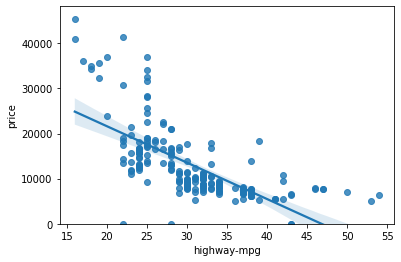

In [ ]:
sns.regplot(x="highway-mpg", y='price', data=df)
plt.ylim(0,)

For this example, the effect of the independent variable is evident in this case. The data trends down as the dependent variable increases. The plot also shows some non-linear behavior.

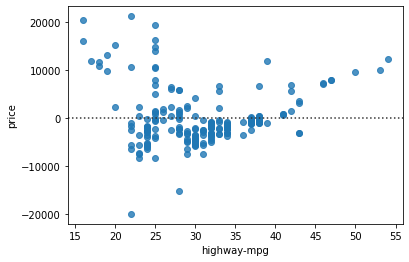

In [ ]:
sns.residplot(x="highway-mpg", y='price', data=df)

Examining the Residual Plot We see in this case the Residuals have a curvature suggesting non-linear behavior. A distribution plot, is a good method for Multiple Linear Regression.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


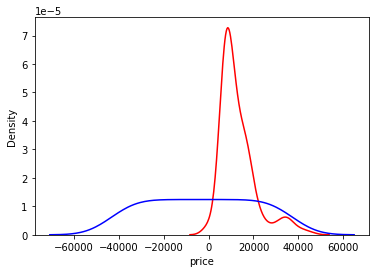

In [ ]:
axl = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')

sns.distplot(yhat, hist=False, color='b', label='Fitted Values', ax=axl)

The graphs shows that maybe a polynomial regression would be more effective on predict the data from the model.

LABS FINISHED
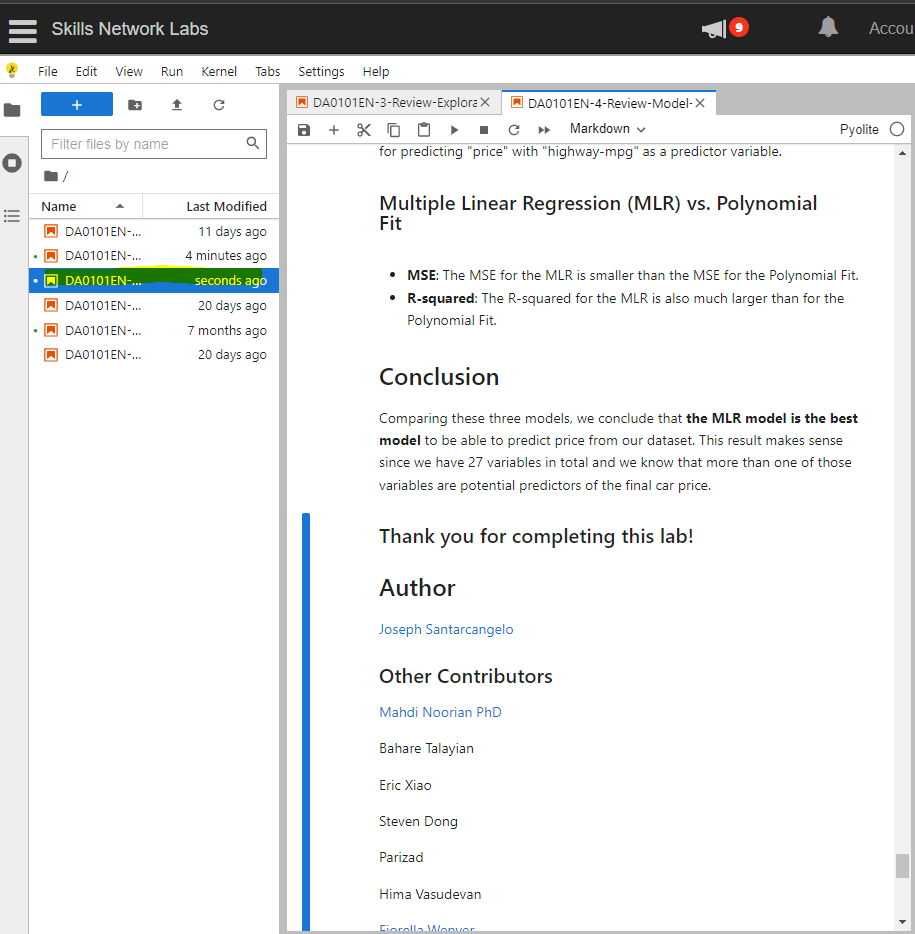
